# 1. Introduction

I decided to study data collected from sales, ranging from 2013 for about 1560 products sold by 10 retail stores across different cities.

The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, I will try to understand the properties of products and stores which play a key role in increasing sales.

So, the idea is to find properties linked to product and see their impact on sales.

# 2. Data Exploration

In [1]:
# Let's start by importing suitable libraries and display first rows of dataset
import seaborn as sns
import pandas as pd
import numpy as np

#Read files:
data = pd.read_csv('data.csv')

data.head(10)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,train
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1,train
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,NaN,Supermarket Type1,train
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,NaN,Supermarket Type1,train


In [2]:
# and let's explore column names
data.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'source'],
      dtype='object')

By putting them in a list:

- Item_Identifier
- Item_Weight
- Item_Fat_Content
- Item_Visibility
- Item_Type
- Item_MRP
- Outlet_Identifier
- Outlet_Establishment_Year
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type
- Item_Outlet_Sales

Total = 12 columns

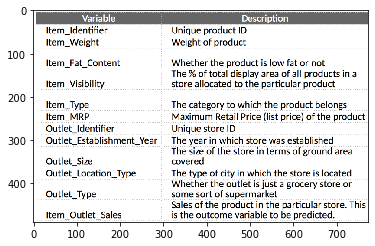

In [3]:
# In the picture below, we can see a description of each column in the dataset
import matplotlib.pyplot as plt
im = plt.imread('snip.png')
plt.imshow(im)

I'll try to predict Item_Outlet_Sales column. Lets start by checking which columns contain missing values into dataset

In [4]:
#data.apply(lambda x: sum(x.isnull()))

data.isnull().sum()


Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

As we can see, 5681 missing values are the one that I want to predict, Item_Outlet_Sales column.
A strange thing is that we have 4016 values with null outlet size and item weight, I'll manage it later.

#### Categorical variables analysis

In [5]:
#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]

#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible ',col)
    print (data[col].value_counts())
    
    


Frequency of Categories for varible  Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible  Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible  Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency of Categories for varible  Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int6



Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’.

# 3. Data Cleaning

As discovered in section 2, we found 2 columns with null values. Which is to say, Item weight and outlet size.
I'll replace null weight with average weight of product with the same identifier

#### Feature: Weight

In [6]:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
print(item_avg_weight)

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
...                      ...
NCZ30                  6.590
NCZ41                 19.850
NCZ42                 10.500
NCZ53                  9.600
NCZ54                 14.650

[1559 rows x 1 columns]


In [7]:
def impute_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]
    
    if pd.isnull(Weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]
    else:
        return Weight

In [8]:
print ('Orignal missing: %d'%sum(data['Item_Weight'].isnull()))
data['Item_Weight'] = data[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1).astype(float)
print ('Final missing: %d'%sum(data['Item_Weight'].isnull()))

Orignal missing: 2439
Final missing: 0


#### Feature: Outletsize

Here I'll deal with outlet size and apply the same logic.

In [9]:
#Import mode function:
from scipy.stats import mode
#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


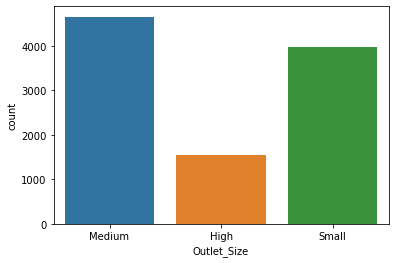

In [10]:
sns.countplot(data['Outlet_Size'])

There seems to be a low number of stores with size equals to “High”. Most of the existent stores seem to be either “Small” or “Medium”. A big store doesn't imply that sales are big as well

In [11]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size
print ('Orignal missing: %d'%sum(data['Outlet_Size'].isnull()))
data['Outlet_Size'] = data[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final missing: %d'%sum(data['Outlet_Size'].isnull()))

Orignal missing: 4016
Final missing: 0


### Feature: Item visibility

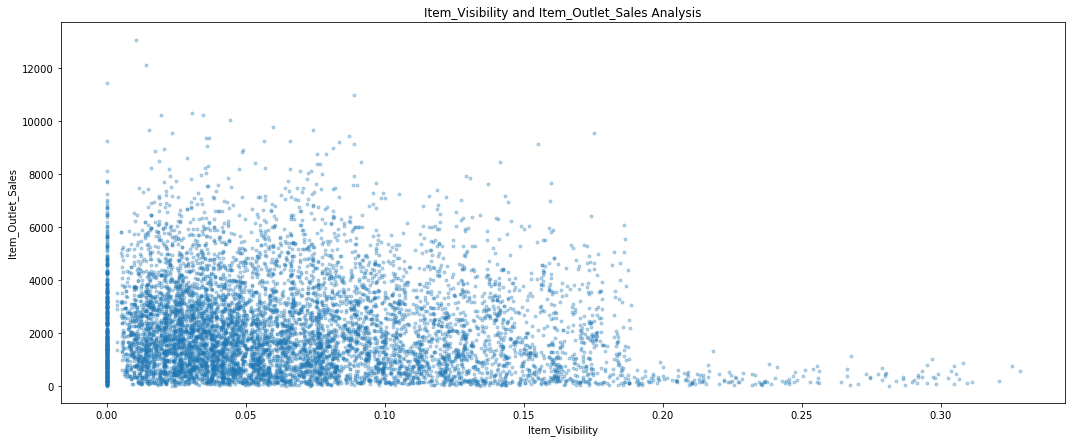

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,7))
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Visibility and Item_Outlet_Sales Analysis')
plt.plot(data.Item_Visibility, data['Item_Outlet_Sales'],'.', alpha = 0.3)

As shown by the scatter plot, the more a product is visible, the less it sells. This behaviour is counter-intuitive but this is what data tell us. On the other hand, to have item visibility equal to 0 does not make sense.
Let’s consider it as missing value and impute it with mean visibility of that product

In [13]:
item_avg_vis = data.pivot_table(values='Item_Visibility', index='Item_Identifier')
print(item_avg_vis)

                 Item_Visibility
Item_Identifier                 
DRA12                   0.034938
DRA24                   0.045646
DRA59                   0.133384
DRB01                   0.079736
DRB13                   0.006799
...                          ...
NCZ30                   0.027302
NCZ41                   0.056396
NCZ42                   0.011015
NCZ53                   0.026330
NCZ54                   0.081345

[1559 rows x 1 columns]


In [14]:
def impute_vis(cols):
    Visibility = cols[0]
    Identifier = cols[1]
    
    if Visibility == 0:
        return item_avg_vis['Item_Visibility'][item_avg_vis.index == Identifier]
    else:
        return Visibility
    
    

print ('Orignal missing: %d'%sum(data['Item_Visibility'] == 0))
data['Item_Visibility'] = data[['Item_Visibility','Item_Identifier']].apply(impute_vis,axis=1).astype(float)
print ('Final missing: %d'%sum(data['Item_Visibility'] == 0))

Orignal missing: 879
Final missing: 0


###  Feature: Years of operation of a store

In [15]:
#Remember the data is from 2013
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

### New Item_Type collector variable creation

As shown in Categorical variables analysis paragraph, Item_types are 16, which don't seem to be useful for our analysis, if taken singularly so it’s a good idea to combine them. If we look closely to the Item_Identifier of each item we see that each one starts with either “FD” (Food), “DR” (Drinks) or “NC” (Non-Consumables). 

Therefore, we can group the items within these 3 categories using function group_by.

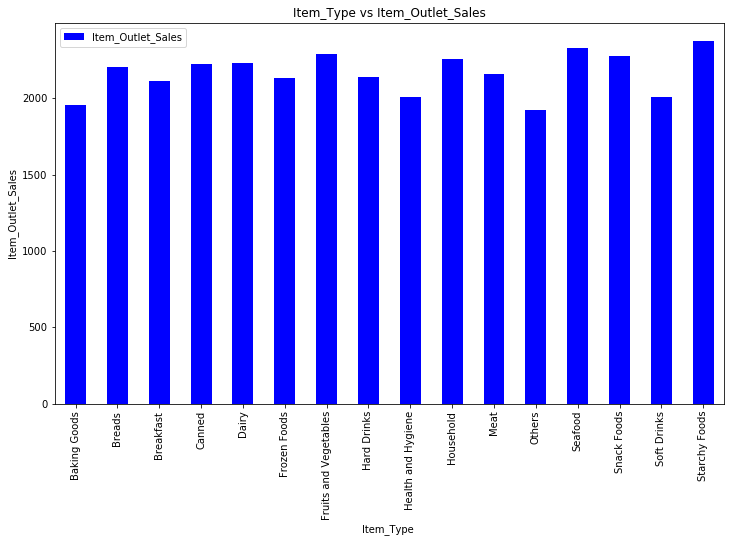

In [16]:
pivoTable = \
data.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.mean)

pivoTable.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Type vs Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

In [17]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})

data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

Now we have some more intuitive names for item type categories.

### Modify categories of Item_Fat_Content

In the same paragraph, Categorical variables analysis, we can see that some categories about item fat content were repetitive or contained typos. So, we can manage them by doing the following:

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


0        Low Fat
1        Regular
2        Low Fat
3        Regular
4        Low Fat
          ...   
14199    Regular
14200    Regular
14201    Low Fat
14202    Regular
14203    Regular
Name: Item_Fat_Content, Length: 14204, dtype: object

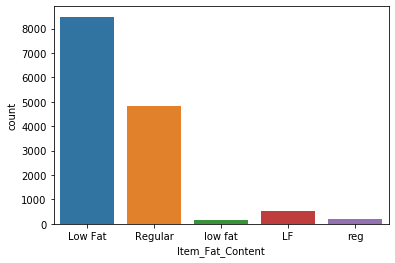

In [18]:
#Change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())
sns.countplot(data['Item_Fat_Content'])
data['Item_Fat_Content']

In [19]:
print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
print(data['Item_Fat_Content'].value_counts())


Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [20]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

Now categories are 3 with respect to initial 5

# 4. Feature Transformations

### One Hot Encoding

Here I deal with categorical variables, they must be transformed into numerical values in order to be used lately while creating a model. Let’s start with turning all categorical variables into numerical values using LabelEncoder().



In [21]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
for i in var_mod:
    data[i] = le.fit_transform(data[i])
    
    

In [22]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Years,Item_Type_Combined,Outlet
0,0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,0,1,1,train,14,1,9
1,2,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,2,1,2,train,4,0,3
2,0,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,0,1,1,train,14,1,9
3,2,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,2,2,0,train,15,1,0
4,1,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,2,0,1,train,26,2,1


After that, we can use get_dummies to generate dummy variables from these numerical categorical variables. One-Hot-Coding refers to creating dummy variables, one for each category of a categorical variable.
Each will have binary numbers — 0 (if the category is not present) and 1(if category is present).


In [23]:
#Dummy Variables:
data = pd.get_dummies(data, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])

In [24]:
# DEBUG
data
#data
#data.to_csv("data_modified.csv",index=False)

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Outlet_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,train,14,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,train,4,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,train,14,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,train,15,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,train,26,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,141.3154,NaN,Snack Foods,0.013496,10.50,1997,OUT046,test,16,...,0,0,0,0,0,0,0,0,1,0
14200,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.60,2009,OUT018,test,4,...,0,0,0,1,0,0,0,0,0,0
14201,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10.00,2002,OUT045,test,11,...,0,0,0,0,0,0,0,1,0,0
14202,FDJ26,214.6218,NaN,Canned,0.088380,15.30,2007,OUT017,test,6,...,0,0,1,0,0,0,0,0,0,0


As we can see, we have only numerical type variables. It's time to export into two separate files, train and test data. In csv format

In [25]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales', 'source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# 5. Model Building

At this stage of the analysis, I'll build a model to predict outlet sales based on variables analyzed so far. I'll train the model and test it using test and train dataset modified in section 4

In [26]:
from sklearn.model_selection import cross_validate

train_df = pd.read_csv('train_modified.csv')
test_df = pd.read_csv('test_modified.csv')

print(train_df.shape)

print(test_df.shape)

(8523, 33)
(5681, 32)


In [27]:
# Creation of predictor
#data.drop(["Team", "Weight"], axis = 1, inplace = True) 

train_df

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.300,OUT049,14,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.920,OUT018,4,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.500,OUT049,14,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.017834,19.200,OUT010,15,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.009780,8.930,OUT013,26,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,214.5218,2778.3834,0.056783,6.865,OUT013,26,1,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,FDS36,108.1570,549.2850,0.046982,8.380,OUT045,11,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8520,NCJ29,85.1224,1193.1136,0.035186,10.600,OUT035,9,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8521,FDN46,103.1332,1845.5976,0.145221,7.210,OUT018,4,0,0,1,...,0,0,0,1,0,0,0,0,0,0


I'll define the target as Outlet sales and the columns to be used as input

In [28]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

In [29]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import metrics

## Linear Regression model

In [30]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

x = np.asanyarray(train_df.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'], axis = 1, inplace = False) )
y = np.asanyarray(train_df[target])


regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [ 1.55554383e+01 -2.14073590e+02  1.63994437e-02  1.57696581e+01
 -1.40348845e+01 -1.36036563e+01  2.76385409e+01 -2.15429720e+02
  2.48412092e+02 -3.29823723e+01 -1.03256208e+02  3.71638640e+02
 -2.68382432e+02 -8.87807542e+02  3.76141479e+02 -8.13326910e+01
  5.92998754e+02 -1.32445212e+00  1.49281084e+01 -1.36036563e+01
 -4.41392227e+02 -1.03256208e+02  1.68444865e+02 -8.13326910e+01
 -4.46415315e+02  5.92998754e+02  1.61912057e+02 -8.19448292e+01
  3.71013018e+02 -1.40027423e+02]


In [31]:
y_hat_LIN= regr.predict(train_df.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'], axis = 1, inplace = False) )
#y_hat.shape

#y.shape

print("Residual sum of squares: %.2f"
      % np.mean((y_hat_LIN - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

x_test = np.asanyarray(test_df.drop(['Item_Identifier','Outlet_Identifier'], axis = 1, inplace = False))

y_test_pred = regr.predict(x_test)
#y_test_pred.shape

Residual sum of squares: 1271075.34
Variance score: 0.56


## Ridge Model

In [32]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=0.05,normalize=True)
x = np.asanyarray(train_df.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'], axis = 1, inplace = False) )
y = np.asanyarray(train_df[target])

clf.fit (x, y)
# The coefficients
print ('Coefficients: ', clf.coef_)

Coefficients:  [ 1.48121840e+01 -2.87449576e+02  2.14082737e-01  3.64625612e+00
 -1.45816863e+01 -1.45455453e+01  2.55744403e+01 -1.15153996e+02
  1.12159842e+02 -6.07641174e+00 -2.75627495e+01  2.03164898e+02
 -1.71012385e+02 -7.94564995e+02  1.74934368e+02 -1.52433397e+02
  6.48709936e+02 -9.84015920e+00  1.50989064e+01 -1.45455453e+01
 -7.77519881e+02 -2.75627495e+01  1.34578282e+02 -1.52433397e+02
 -7.02106388e+02  6.48709936e+02  1.65722300e+02 -4.60152154e+01
  2.19988225e+02 -3.91773731e+01]


In [33]:
y_hat_RD= clf.predict(train_df.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'], axis = 1, inplace = False) )
#y_hat.shape
#y.shape
print("Residual sum of squares: %.2f"
      % np.mean((y_hat_RD - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % clf.score(x, y))

x_test = np.asanyarray(test_df.drop(['Item_Identifier','Outlet_Identifier'], axis = 1, inplace = False))
y_test_pred = clf.predict(x_test)
#y_test_pred.shape

Residual sum of squares: 1273492.11
Variance score: 0.56


## Decision Tree Model

In [34]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

x = np.asanyarray(train_df.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'], axis = 1, inplace = False) )
y = np.asanyarray(train_df[target])

DT.fit (x, y)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=100,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [35]:
predTree = DT.predict(train_df.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'], axis = 1, inplace = False) )
#y_hat.shape
#y.shape
print("Residual sum of squares: %.2f"
      % np.mean((predTree - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % DT.score(x, y))

x_test = np.asanyarray(test_df.drop(['Item_Identifier','Outlet_Identifier'], axis = 1, inplace = False))
y_test_pred = DT.predict(x_test)
#y_test_pred.shape

Residual sum of squares: 1123205.08
Variance score: 0.61


# 6. Conclusion

As we can see by looking at variance score, the algorithm which works better is Decision Tree the one with a variance equal to 0.61. Remember that the best possible score is 1.0, lower values are worse.
So, in order to predict Item outlet sales the algorithm to be used is Random Forest.